##### Data Preprocessing
**Import Packages and CSV**

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)
df =  pd.read_csv("Visadataset.csv")
print(df.shape)

(25480, 12)


#### Data Cleaning:
**Handling Missing Values**

- Handling Missing Values
- Handling Duplicates.
- Remove irrelevant features
- check Datatypes.
- Understand the dataset

#### 3.1 Check Null Values

In [52]:
features_with_na_values = [features for features in df.columns if df[features].isnull().sum()>=1]
for feat in features_with_na_values:
    print(feat,np.round(df[feat].isnull().mean()*100,5),'% missing values')

In [53]:
features_with_na_values

[]

#### 3.2 Check Duplicates

In [54]:
df.duplicated().sum()

np.int64(0)

In [55]:
df[['no_of_employees','yr_of_estab','prevailing_wage']].value_counts()

no_of_employees  yr_of_estab  prevailing_wage
-26              1923         5247.3200          1
                 1954         81982.2700         1
                 1968         168.1558           1
                 1996         37397.0500         1
                 2004         84359.9800         1
                                                ..
 547172          1838         22859.2200         1
 579004          1969         103507.0100        1
 581468          1984         41397.5200         1
 594472          1887         87144.2000         1
 602069          2011         25181.6300         1
Name: count, Length: 25480, dtype: int64

In [56]:
df[(df['yr_of_estab']==2000)&(df['no_of_employees']==802)] # 2000 and 802

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
3043,EZYV3044,North America,Doctorate,Y,N,802,2000,West,109585.81,Year,Y,Certified
3172,EZYV3173,Asia,Bachelor's,N,N,802,2000,Midwest,112499.63,Year,Y,Denied
14306,EZYV14307,Europe,High School,N,N,802,2000,Northeast,24821.87,Year,Y,Denied
19887,EZYV19888,Asia,Bachelor's,N,N,802,2000,South,147219.69,Year,Y,Certified


**Dataset contains any duplicate records**

##### 3.3 Remove Irrelevant features
- case_id : This feature will not be required for further model building. 

In [57]:
df2 = df.drop(columns=['case_id'])#by default axis = 1 drops column
df2

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


#### 3.5 Check DataTypes

In [58]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.1+ MB


- It does not contians any Null Records and Datatypes are also correct.
- one float variable , two int variable and eight object variable datatypes.
- Three Numerical Features and Eight Categorical Features.

#### 3.5.1 Types of Features

#### Numerical Features:

In [59]:
numerical_features = [features for features in df2.columns if df2[features].dtype !='O']
print(f"Numerical Features: {numerical_features}\nNumber of Numerical Features:{len(numerical_features)}")

Numerical Features: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
Number of Numerical Features:3


#### Categorcal Features:

In [60]:
categorical_features = [features for features in df2.columns if df2[features].dtype == 'O']
print(f"Categorical Features: {categorical_features}\nNumber of Categorical Features:{len(categorical_features)}")

Categorical Features: ['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']
Number of Categorical Features:8


#### Numerical Feature into Discrete Feature and Continuous Feature:

In [61]:
discrete,continuous = ([f for f in numerical_features if df2[f].nunique()<=25],[f for f in numerical_features if df2[f].nunique()>25])
print(f"Discrete column :{discrete}\nContinuous column: {continuous}")

Discrete column :[]
Continuous column: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


In [62]:
df2.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [63]:
df2[df2['no_of_employees']<1].shape[0]

33

In [64]:
df2[df2['yr_of_estab']>=2005]['yr_of_estab'].value_counts().values.sum()#year of established after 2005 year Total number of companies established

np.int64(6751)

In [65]:
df2[df2['yr_of_estab']<2005]['yr_of_estab'].value_counts().values.sum() # year of established before and equal to 2005 year Total number of companies established

np.int64(18729)

**No of employees**
- No of employees has mean 5667 and median of 2109
- Standarad Deviation is 22877 away from mean it means it has high spread
- 50% of no employees are less than 2109 which shows 50% of data contains lesser values
- max is 602069 and min -26. This contains outlier need to be handled.
- mean > median >= Mode : right skewedness indication.

**Year of Establishment**
- It contains record from 1800's to 2016's of year of establishment of Employeer.
- Mean Year of Establishment of Employeer is 1979 and Median Year of 1997.
- 75% of Employeer's companies are established before 2005 year.
- The spread is low std(42.36) and mean(1979) < median(1997) < mode shows that distribution is slightly left skewed.

**Prevailing Wage**
- 50% of wages of employees are less than 70,308 dollars.
- Minimum Wage of employee is 2.13 and Maximum Wage is 3,19,210 dollars.
- Average Wage is 74,455 dollar with std is 52,815 which shows high spread.
- Mean(74,455) >= Median(70,308) >= Mode it is slight moderate right skewed.
- 75% of wages of Employees are less than 1,07,735 it might have more outliers.
- Very low wage may be invalid - validate.

**Here the most important step is to validate the values and check for outliers**

##### Feature Engineering:

**Feature Creation:**
- create Company age feature from year of established column.

In [66]:
from datetime import date

today_date = date.today()
current_year = today_date.year
print(current_year)

2025


In [67]:
df2['company_age'] = current_year - df2['yr_of_estab']
df2.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,18
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,23
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,17
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,128
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,20


In [68]:
df2.drop('yr_of_estab',inplace=True,axis=1)

In [69]:
df2

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,18
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,23
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,17
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,128
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,20
...,...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,2601,South,77092.5700,Year,Y,Certified,17
25476,Asia,High School,Y,N,3274,Northeast,279174.7900,Year,Y,Certified,19
25477,Asia,Master's,Y,N,1121,South,146298.8500,Year,N,Certified,115
25478,Asia,Master's,Y,Y,1918,West,86154.7700,Year,Y,Certified,138


#### 2. Spliting for Transform/Scale:

In [70]:
X = df2.drop('case_status',axis=1)
y = df2['case_status']

In [71]:
X.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,18
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,23
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,17
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,128
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,20


In [72]:
y.head()

0       Denied
1    Certified
2       Denied
3       Denied
4    Certified
Name: case_status, dtype: object

#### 3. Encoding Target column:

In [73]:
y = np.where(y=='Denied',1,0)
y

array([1, 0, 1, ..., 0, 0, 0], shape=(25480,))

#### 4. Feature Transformation:

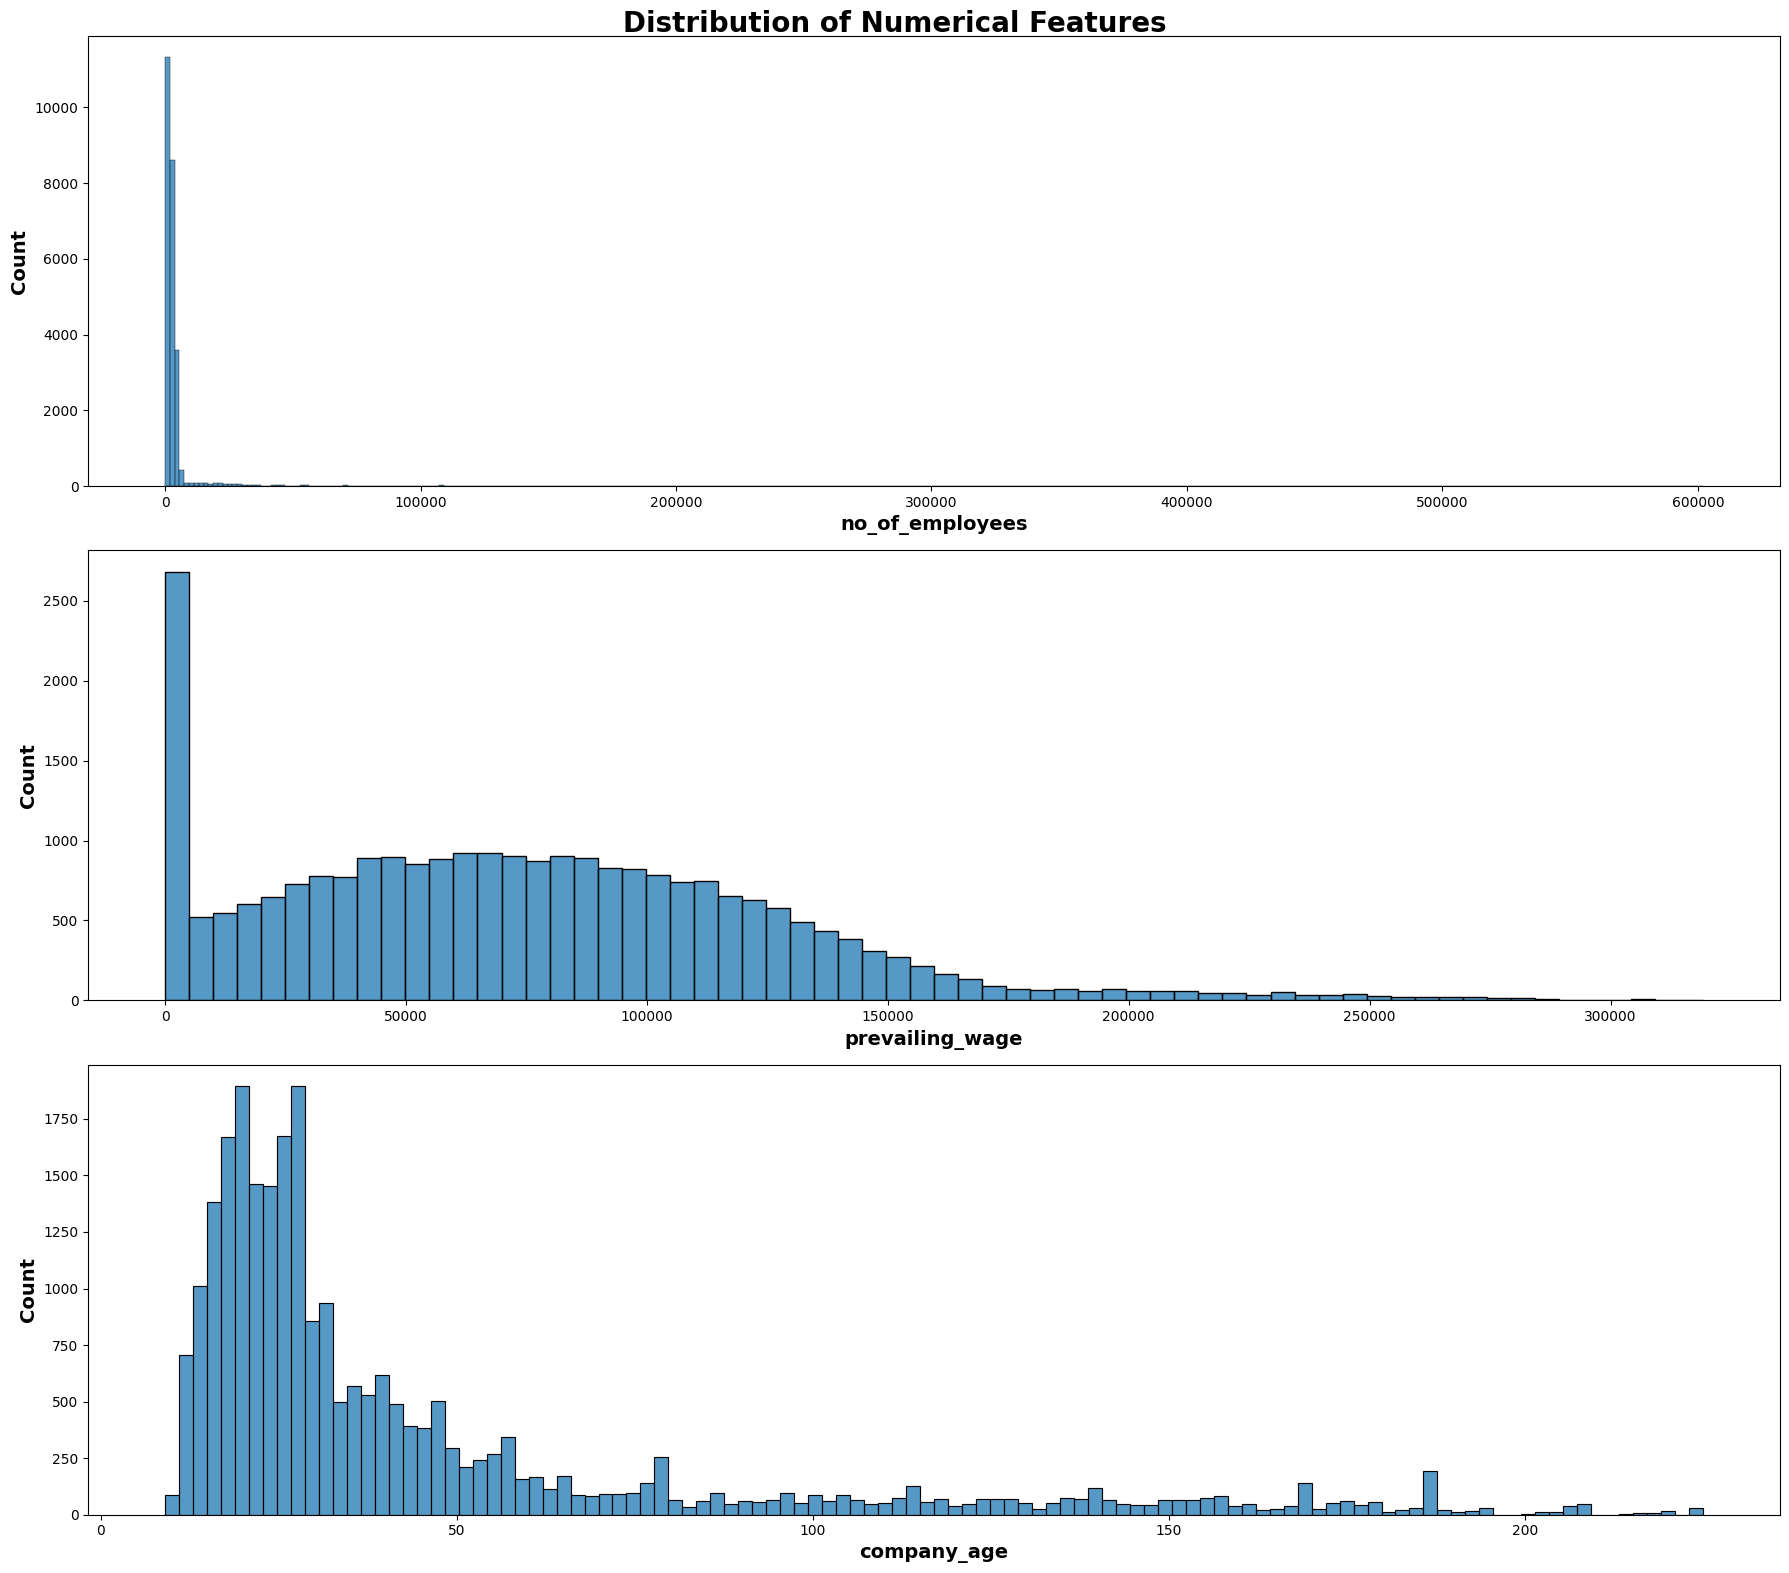

In [74]:
new_numerical_features = [f for f in df2.columns  if df2[f].dtype != 'O']
fig,ax = plt.subplots(3,1,figsize=(18,16))
plt.suptitle("Distribution of Numerical Features",fontsize=20,weight='bold')
for i,col in enumerate(new_numerical_features):
    sns.histplot(x=X[col],ax=ax[i])
    ax[i].set_xlabel(col,fontsize=14,weight='bold')
    ax[i].set_ylabel('Count',fontsize=14,weight='bold')

plt.tight_layout()
plt.show()

- Number of employee and company age features are more skewed compared to prevailing age.
- The outlier natures is in both ends at initial and at final end mostly the Number of employee feature column whereas company age has also outlier at lateral age with bins of 50 year each.
- If we look at the spread of company age distribution it is very low in volume after and before 50 bin whereas prevailing age is nice spread at majority of wages distribution it has not very much outlier compare to company age but inittial it has that need to be handled.
- In these features there are negative and positive values which can see we can apply boxcoc transformation but it doesnot handle negative values so we use **Yeo Johnson transformation** that handle both skew type left and right skewed.

#### 4.1 Check Skeweness:

In [75]:
X[new_numerical_features].skew()

no_of_employees    12.265260
prevailing_wage     0.755776
company_age         2.037301
dtype: float64

- no_of_employees is very highly skewed as skewness value tells it which is **(12.26)** whereas this column values tells that employeer company number of employee in that company doing work, As this column doesnot contain duplicate records this shows that it is valid column the value it hold tells lot of information about size of company.Need to handle this by power transformation.
- company_age is positively skewed this also contain unique infromation which is **2.03**.
- prevailing_wage is moderate positive skew it doesnot contain that many outliers with **0.75**.

**These columns are important this are unique and independent columns which gives unique information,But we need transformation to handle outliers mainly**

#### 5.Applying Power Transformation:

In [76]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
var = 'prevailing_wage'# change to empty
print(type(new_numerical_features))
# maximizes gaussianity of the transformed data
for i in new_numerical_features:
    if i == var:
        new_numerical_features.remove(var)
    else:
        pass
#uncommented for first run
print(new_numerical_features)
X_transformed_features = pt.fit_transform(X[new_numerical_features])
X_transformed_features

<class 'list'>
['no_of_employees', 'company_age']


array([[ 1.51729976, -0.95555058],
       [ 0.03091211, -0.4670008 ],
       [ 2.88507606, -1.07836333],
       ...,
       [-0.41388512,  1.55020884],
       [-0.11194883,  1.68473895],
       [ 0.21874168,  1.02763812]], shape=(25480, 2))

In [77]:
X_copy = pd.DataFrame(X_transformed_features,columns=new_numerical_features)
X_copy.head()

,no_of_employees,company_age
0,1.517300,-0.955551
1,0.030912,-0.467001
2,2.885076,-1.078363
3,-1.343550,1.630914
4,-0.432287,-0.738126


<Figure size 1200x600 with 0 Axes>

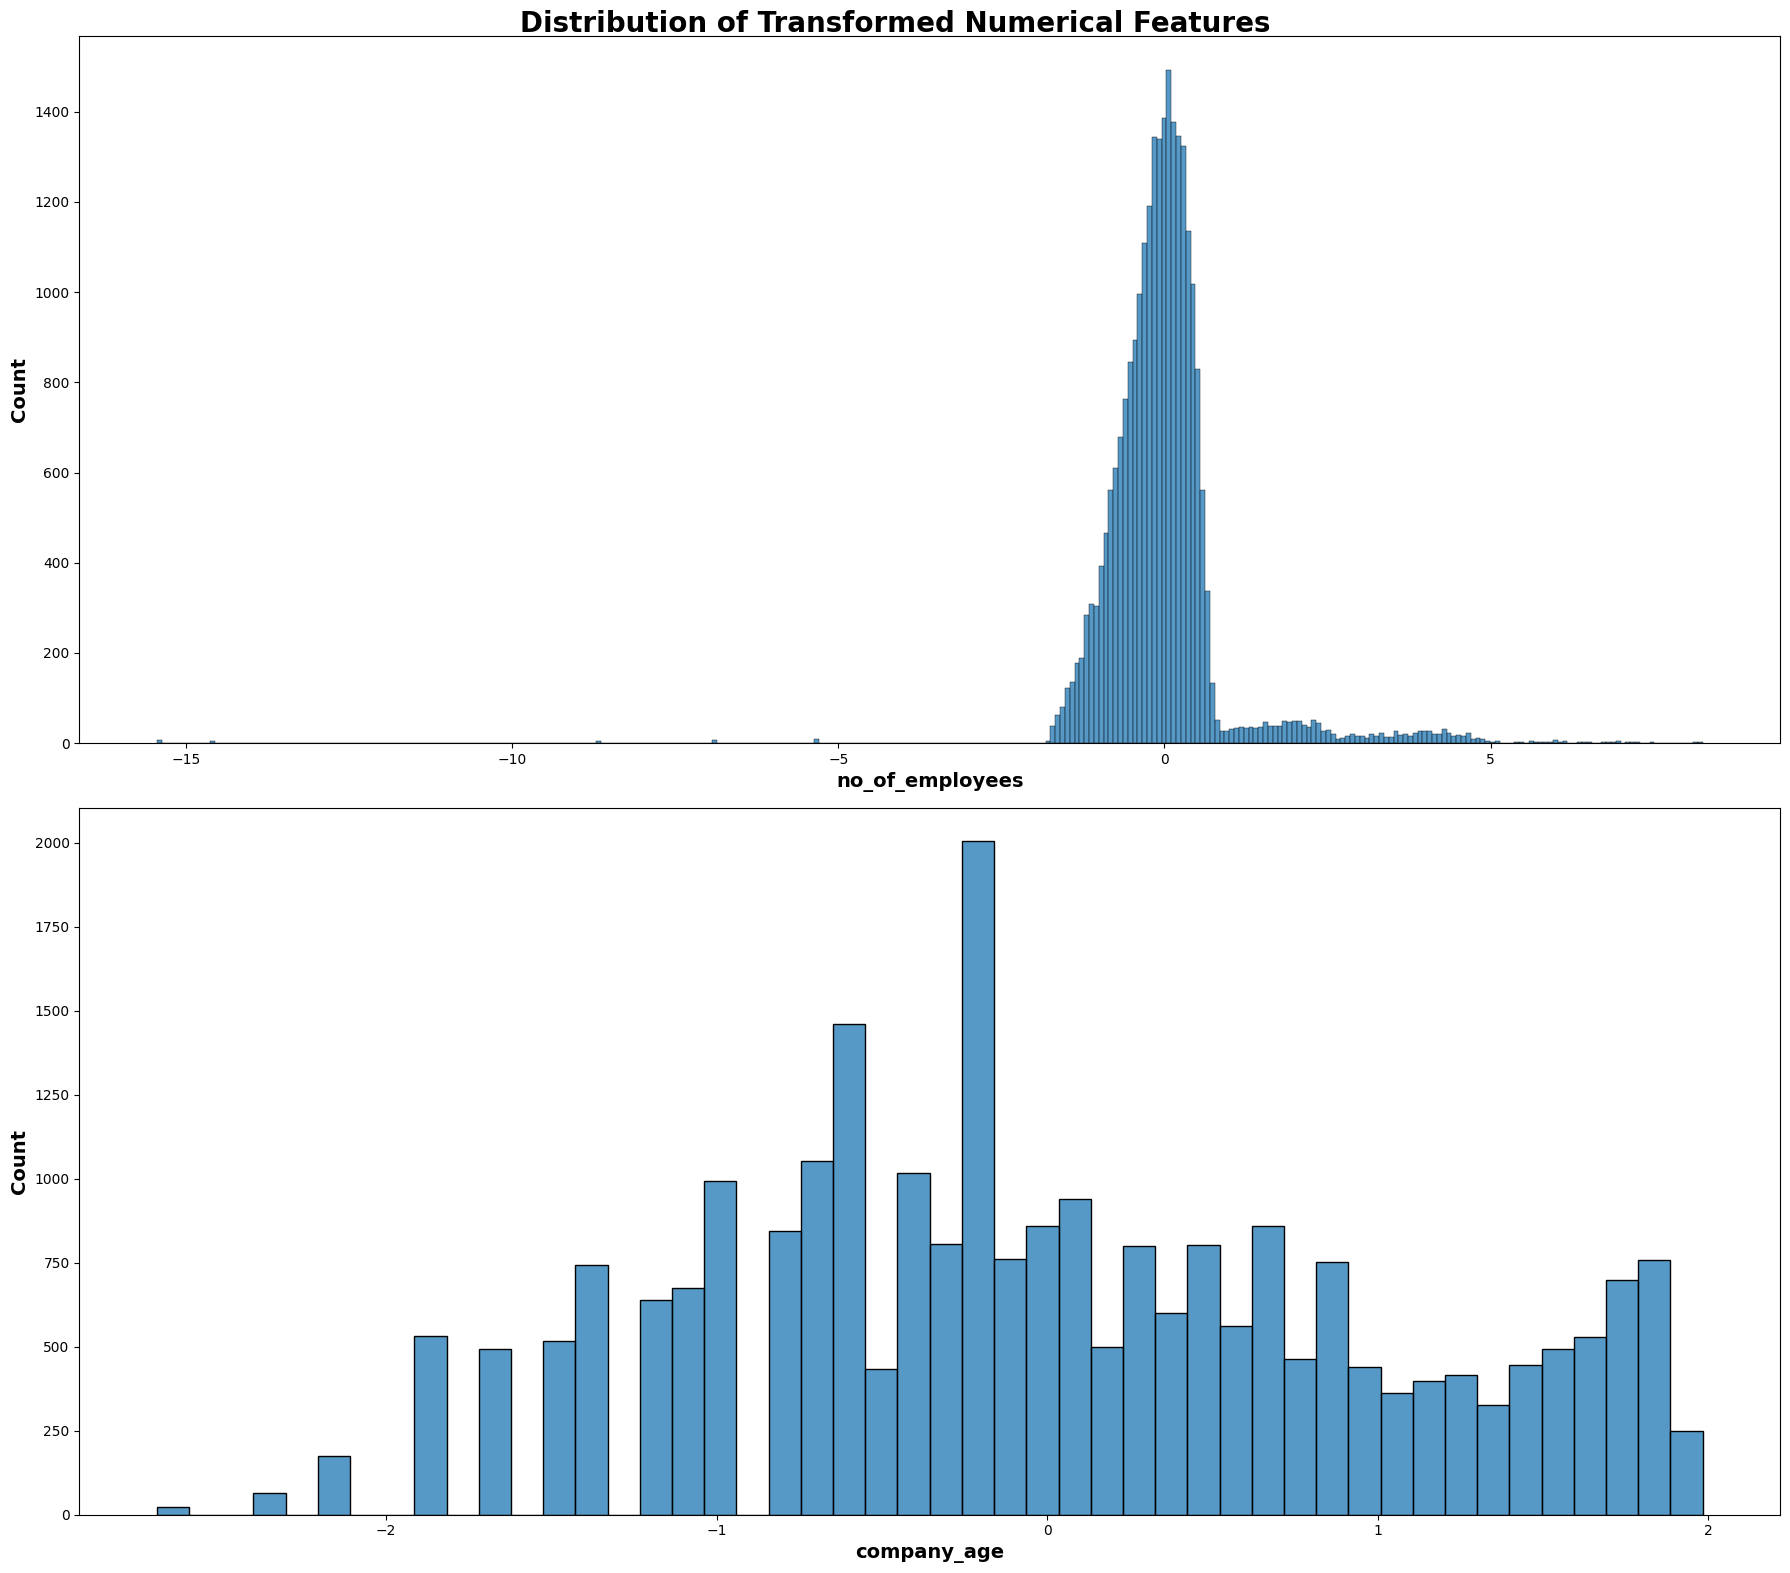

In [78]:
plt.figure(figsize=(12,6))
num = len(new_numerical_features)
fig,ax = plt.subplots(num,1,figsize=(18,16))
plt.suptitle("Distribution of Transformed Numerical Features",fontsize=20,weight='bold')
for i,col in enumerate(new_numerical_features):
    sns.histplot(x=X_copy[col],ax=ax[i])
    ax[i].set_xlabel(col,fontsize=14,weight='bold')
    ax[i].set_ylabel('Count',fontsize=14,weight='bold')

plt.tight_layout()
plt.show()

#### Check the Transformed Column from non-normalized to normalized distribution

In [79]:
X_copy[new_numerical_features].skew()

no_of_employees    0.399339
company_age        0.112260
dtype: float64

- Number of employees and company age asymmetric columns are transformed into symmertic curve nature by performing squishing and stretch way.

In [80]:
print("Number of unique features into Categorical Columns:")
for features in categorical_features:
    print(str(features+":"+str(df2[features].nunique())))
    print("---"*50)
    print(str(df2[features].unique()))
    print("***"*50)

Number of unique features into Categorical Columns:
continent:6
------------------------------------------------------------------------------------------------------------------------------------------------------
['Asia' 'Africa' 'North America' 'Europe' 'South America' 'Oceania']
******************************************************************************************************************************************************
education_of_employee:4
------------------------------------------------------------------------------------------------------------------------------------------------------
['High School' "Master's" "Bachelor's" 'Doctorate']
******************************************************************************************************************************************************
has_job_experience:2
------------------------------------------------------------------------------------------------------------------------------------------------------
['N' 'Y']
*****

#### 6. Feature encoding and Scaling

**Why to perform Feature encoding ?**
Machine learning algorithm cannot understand string data so they need to be converted into numerical form.So we use feature encoding to convert it.Some Models like tree based has that ability.

Categorical Variables are of two form :
1. Nominal Variable/Features : These variable are category values like Gender,Color,City.Which cannot be measured in math comparsion red>blue and it also doesnot have any order.For this variables we only use **one hot encoding** most perferd.what it does is keeps categories indepedent by creating binary columns.we can use label encoding but linear model tends to assume it be order and confuse the model like red>blue if Tree based model are used then it most perferd.
2. Ordinal Variable/Features : These variable has meaningful order,but the distance between them isn't fixed.It preserves order.examples : education,ratings,shirt size,class divisions. we use ordinal encoding or label encoding (one hot encoding vice versa).


**what is Feature Scaling?**
- Some features may have larger values or different units of measurment or encoding value while other may have small values that makes model computation costly and model get baised so what we do we put all the features onto a scale so the model doesnot get biased.


1. Normalization: it known as min max scaler which scale the value to 0 to 1 range.Here the data is rescaled just shift and scale.It doesnot care about distribution like skewed,uniform or any type of distribution.

2. Standardization : It scales values with mean = 0 and std = 1 .It assumes that data is roughly symmetric or nearly symmertic.

3. Robust Scaler: Useful when  data contains outlier beacause it is robust to extreme values it uses median and IQR instead of mean and std.


In [81]:
numerical_features = list(X.select_dtypes(exclude='object').columns)
numerical_features

['no_of_employees', 'prevailing_wage', 'company_age']

#### 6.1 Column Transformer

- Nominal/Binary : has_job_experience, requires_job_training , full_time_position
- Ordinal : continent , unit of wage , region_of_employment , education_of_employee
- Transformed : no_of_employees , company_age



In [82]:
Nominal_columns = ['has_job_experience', 'requires_job_training' , 'full_time_position']
Ordinal_columns = ['continent' , 'unit_of_wage' , 'region_of_employment','education_of_employee' ]
Transformed_columns = ['no_of_employees','company_age']

#nominal columns - one hot encoder
#oridnal columns - ordinal encoder
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,PowerTransformer,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

std_scr = StandardScaler()
one_enc = OneHotEncoder()
ord_enc = OrdinalEncoder()

transformer_pipeline = Pipeline(steps=[('transformer',PowerTransformer(method='yeo-johnson'))])
Preprocessor = ColumnTransformer(
    [
        ('one hot encoder',one_enc,Ordinal_columns),
        ('ordinal encoder',ord_enc,Ordinal_columns),
        ('power transformer',transformer_pipeline,Transformed_columns),
        ('standard scaler',std_scr,numerical_features)
    ]
)

In [83]:
X = Preprocessor.fit_transform(X)

In [84]:
X.shape

(25480, 28)

In [85]:
X

array([[ 0.        ,  1.        ,  0.        , ...,  0.38666657,
        -1.39853722, -0.65122993],
       [ 0.        ,  1.        ,  0.        , ..., -0.14228155,
         0.1698353 , -0.53321103],
       [ 0.        ,  1.        ,  0.        , ...,  1.69498375,
         0.91907852, -0.6748337 ],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.19871259,
         1.36027953,  1.63833662],
       [ 0.        ,  1.        ,  0.        , ..., -0.16387483,
         0.22150859,  2.18122353],
       [ 0.        ,  1.        ,  0.        , ..., -0.10805575,
        -0.06776315,  0.45814768]], shape=(25480, 28))

#### 7. Imbalanced Data Handling:

In [86]:
from imblearn.combine import SMOTEENN,SMOTETomek

# Resampling the minority class. The strategy can be changed as required we will use smoteeen but it can change.
smt = SMOTEENN(random_state=42,sampling_strategy='minority')
X_res,y_res = smt.fit_resample(X,y)

In [87]:
X_res.shape,y_res.shape

((15350, 28), (15350,))

#### 8. Train Test Split

- Train test split procedure is used to estimate the performance of machine learning algorithm when they are used to make predictions on data not used to train.
- It makes model training on train data and make prediction on test data.
- It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithm.

In [88]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape,X_test.shape  

((12280, 28), (3070, 28))

In [89]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay, \
                            precision_score,recall_score,f1_score,roc_auc_score,roc_curve
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [90]:
def evaluate_clf(true,prediction):
    acc = accuracy_score(true,prediction)
    f1 = f1_score(true,prediction)
    precision = precision_score(true,prediction)
    recall = recall_score(true,prediction)
    roc_auc = roc_auc_score(true,prediction)
    return acc,f1,precision,recall,roc_auc

In [91]:
models = {
    'Random Forest Classifier': RandomForestClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'Logistic Regression Classifier': LogisticRegression(),
    'K-Neighbors Classifier': KNeighborsClassifier(),
    'XGBClassifier': XGBClassifier(),
    'CatBossting Classifier': CatBoostClassifier(verbose=False),
    'Support Vector Classifier': SVC(),
    'AdaBoost Classifier': AdaBoostClassifier()
}

In [92]:
def evaluate_models(X,y,models):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    models_list = []
    accuracy_list = []
    auc = []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train,y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        model_train_accuracy,model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score = evaluate_clf(y_train,y_train_pred)

        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score = evaluate_clf(y_test,y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print("Model Training for Training set")
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print("- F1 Score: {:.4f}".format(model_train_f1))
        print("- Precision: {:.4f}".format(model_train_precision))
        print("- Recall: {:.4f}".format(model_train_recall))
        print("- ROC AUC: {:.4f}".format(model_train_rocauc_score))

        print("--"*50)

        print("Model performance for Testining set")
        print("- Accuracy: {:.4f}".format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print("- F1 Score: {:.4f}".format(model_test_f1))
        print("- Precision: {:.4f}".format(model_test_precision))
        print("- Recall: {:.4f}".format(model_test_recall))
        print("- ROC AUC: {:.4f}".format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print("=="*35)
        print("\n")

    report = pd.DataFrame(list(zip(models_list,accuracy_list)),columns=['Model Name','Accuracy']).sort_values(by=['Accuracy'],ascending=False)
    return report;    


#### Model Training:

In [93]:
base_model_report = evaluate_models(X_res,y_res,models=models)

Random Forest Classifier
Model Training for Training set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC: 1.0000
----------------------------------------------------------------------------------------------------
Model performance for Testining set
- Accuracy: 0.9368
- F1 Score: 0.9428
- Precision: 0.9356
- Recall: 0.9501
- ROC AUC: 0.9354


Decision Tree Classifier
Model Training for Training set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC: 1.0000
----------------------------------------------------------------------------------------------------
Model performance for Testining set
- Accuracy: 0.9042
- F1 Score: 0.9139
- Precision: 0.9012
- Recall: 0.9269
- ROC AUC: 0.9018


Gradient Boosting Classifier
Model Training for Training set
- Accuracy: 0.8722
- F1 Score: 0.8831
- Precision: 0.8910
- Recall: 0.8754
- ROC AUC: 0.8719
----------------------------------------------------------------------------------

In [94]:
base_model_report

,Model Name,Accuracy
0,Random Forest Classifier,0.936808
4,K-Neighbors Classifier,0.931922
5,XGBClassifier,0.911726
6,CatBossting Classifier,0.910423
1,Decision Tree Classifier,0.904235
2,Gradient Boosting Classifier,0.869055
3,Logistic Regression Classifier,0.858958
7,Support Vector Classifier,0.858306
8,AdaBoost Classifier,0.852117


#### Hyper Paramater Tuning:

In [95]:
xgboost_params={
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

rf_params={
    'max_depth':[10,12,None,14,15],
    'max_features':['sqrt','log2',None],
    'n_estimators':[10,50,100,200]
}

knn_params = {
    'algorithm':['auto','balltree','kd_tree','brute'],
    'weights':['uniform','distance'],
    'n_neighbors':[3,4,5,7,9]
}

In [96]:
randomcv_model = [
    ('XGBoost',XGBClassifier(),xgboost_params),
    ('RF',RandomForestClassifier(),rf_params),
    ('KNN',KNeighborsClassifier(),knn_params)
]

In [98]:
from sklearn.model_selection import RandomizedSearchCV

model_params={}
for name,model,params in randomcv_model:
    random = RandomizedSearchCV(estimator=model,
                       param_distributions=params,
                       n_iter=100,
                       cv=3,
                       verbose=2,
                       n_jobs=-1)
    random.fit(X_res,y_res)
    model_params[name]=random.best_params_

for model_name in model_params:
    print(f"-----------Best params for {model_name}----------")
    print(model_params[model_name])

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits
-----------Best params for XGBoost----------
{'min_child_weight': 1, 'max_depth': 9}
-----------Best params for RF----------
{'n_estimators': 100, 'max_features': 'log2', 'max_depth': None}
-----------Best params for KNN----------
{'weights': 'distance', 'n_neighbors': 3, 'algorithm': 'auto'}


In [99]:
model_params

{'XGBoost': {'min_child_weight': 1, 'max_depth': 9},
 'RF': {'n_estimators': 100, 'max_features': 'log2', 'max_depth': None},
 'KNN': {'weights': 'distance', 'n_neighbors': 3, 'algorithm': 'auto'}}

In [100]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    'Random Forest Classifier':RandomForestClassifier(**model_params['RF']),
    'KNeighborsClassifier':KNeighborsClassifier(**model_params['KNN']),
    'XGBClassifier':XGBClassifier(**model_params['XGBoost'],n_jobs=-1),
}

tuned_report = evaluate_models(X=X_res,y=y_res,models=best_models)

Random Forest Classifier
Model Training for Training set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC: 1.0000
----------------------------------------------------------------------------------------------------
Model performance for Testining set
- Accuracy: 0.9362
- F1 Score: 0.9424
- Precision: 0.9320
- Recall: 0.9531
- ROC AUC: 0.9344


KNeighborsClassifier
Model Training for Training set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC: 1.0000
----------------------------------------------------------------------------------------------------
Model performance for Testining set
- Accuracy: 0.9694
- F1 Score: 0.9725
- Precision: 0.9585
- Recall: 0.9869
- ROC AUC: 0.9675


XGBClassifier
Model Training for Training set
- Accuracy: 0.9976
- F1 Score: 0.9978
- Precision: 0.9969
- Recall: 0.9987
- ROC AUC: 0.9974
----------------------------------------------------------------------------------------------------


In [101]:
tuned_report

,Model Name,Accuracy
1,KNeighborsClassifier,0.969381
0,Random Forest Classifier,0.936156
2,XGBClassifier,0.927687


In [106]:
best_model = KNeighborsClassifier(**model_params['KNN'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("Final Model KNN")
print("Accuaracy Score Values:{:.4f}".format(score))
print(cr)

Final Model KNN
Accuaracy Score Values:0.9694
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1387
           1       0.96      0.99      0.97      1683

    accuracy                           0.97      3070
   macro avg       0.97      0.97      0.97      3070
weighted avg       0.97      0.97      0.97      3070



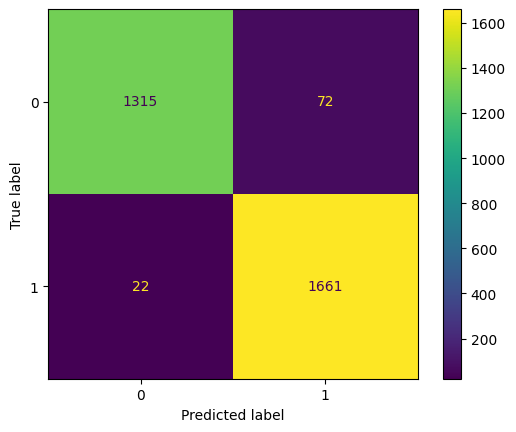

In [107]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model,X_test,y_test)

#### Best Model is KNN with Accuracy of 96.93%